In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/matthewgittings/Flatiron/Phase_4_Project/Instagram_Data.csv')

In [3]:
import datetime as dt
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Posted']=df['Date Posted'].dt.strftime('%d-%m-%Y')
# removing time from the date posted
df['Date Posted'] = pd.to_datetime(df['Date Posted'])

In [4]:
df1 = df.drop(columns = ['Year','Month','Day','Hour','Minute','Type'])

In [5]:
df2 = df1.groupby(by=['Date Posted']).sum()

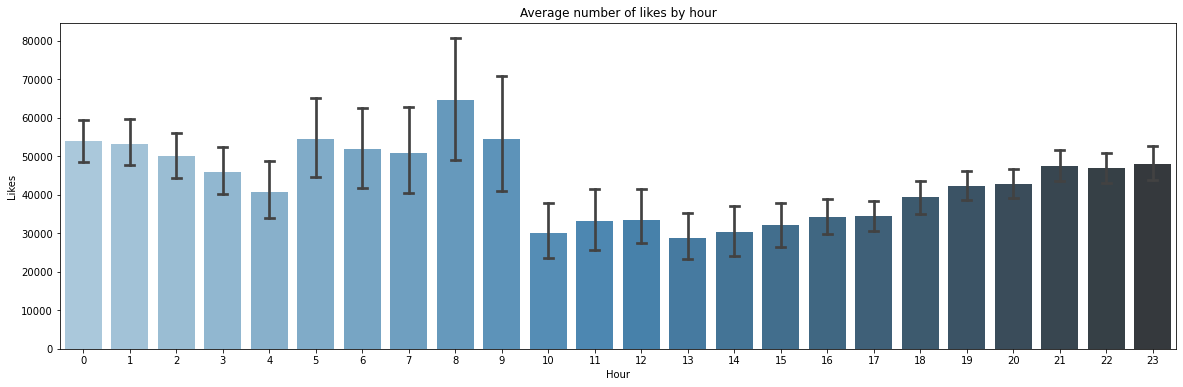

In [6]:
plt.figure(figsize=(20,6))
sns.barplot(x='Hour', y='Likes', data=df, palette='Blues_d', capsize=.2)
plt.title("Average number of likes by hour")
plt.show()

<AxesSubplot:xlabel='Date Posted'>

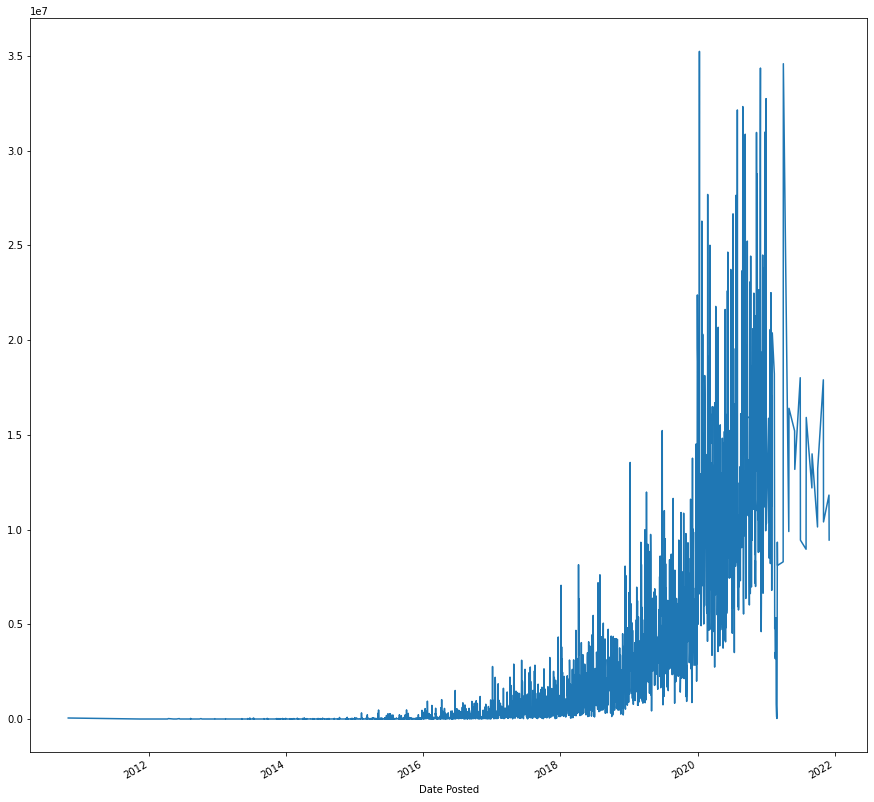

In [26]:
#Checking out if there is any trend in likes data
df2['Likes'].plot(figsize = (15,15))

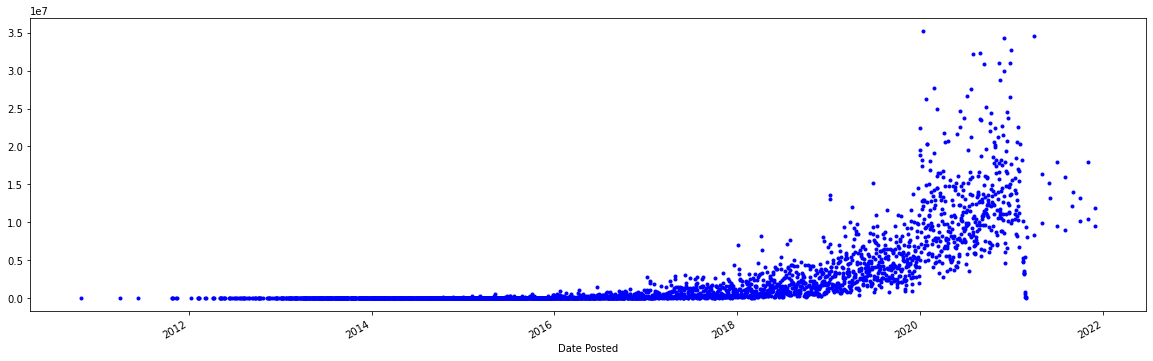

In [8]:
df2['Likes'].plot(figsize = (20,6), style = '.b');

<AxesSubplot:>

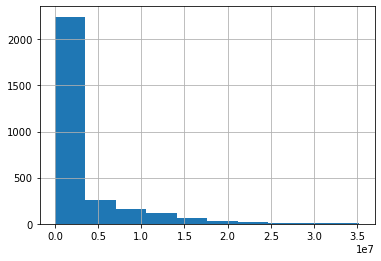

In [9]:
df2['Likes'].hist(bins = 10)

In [10]:
ts = df2['Likes'].fillna(method='bfill')

In [11]:
roll_mean = ts.rolling(window=8, center=False).mean()
roll_std = ts.rolling(window=8, center=False).std()

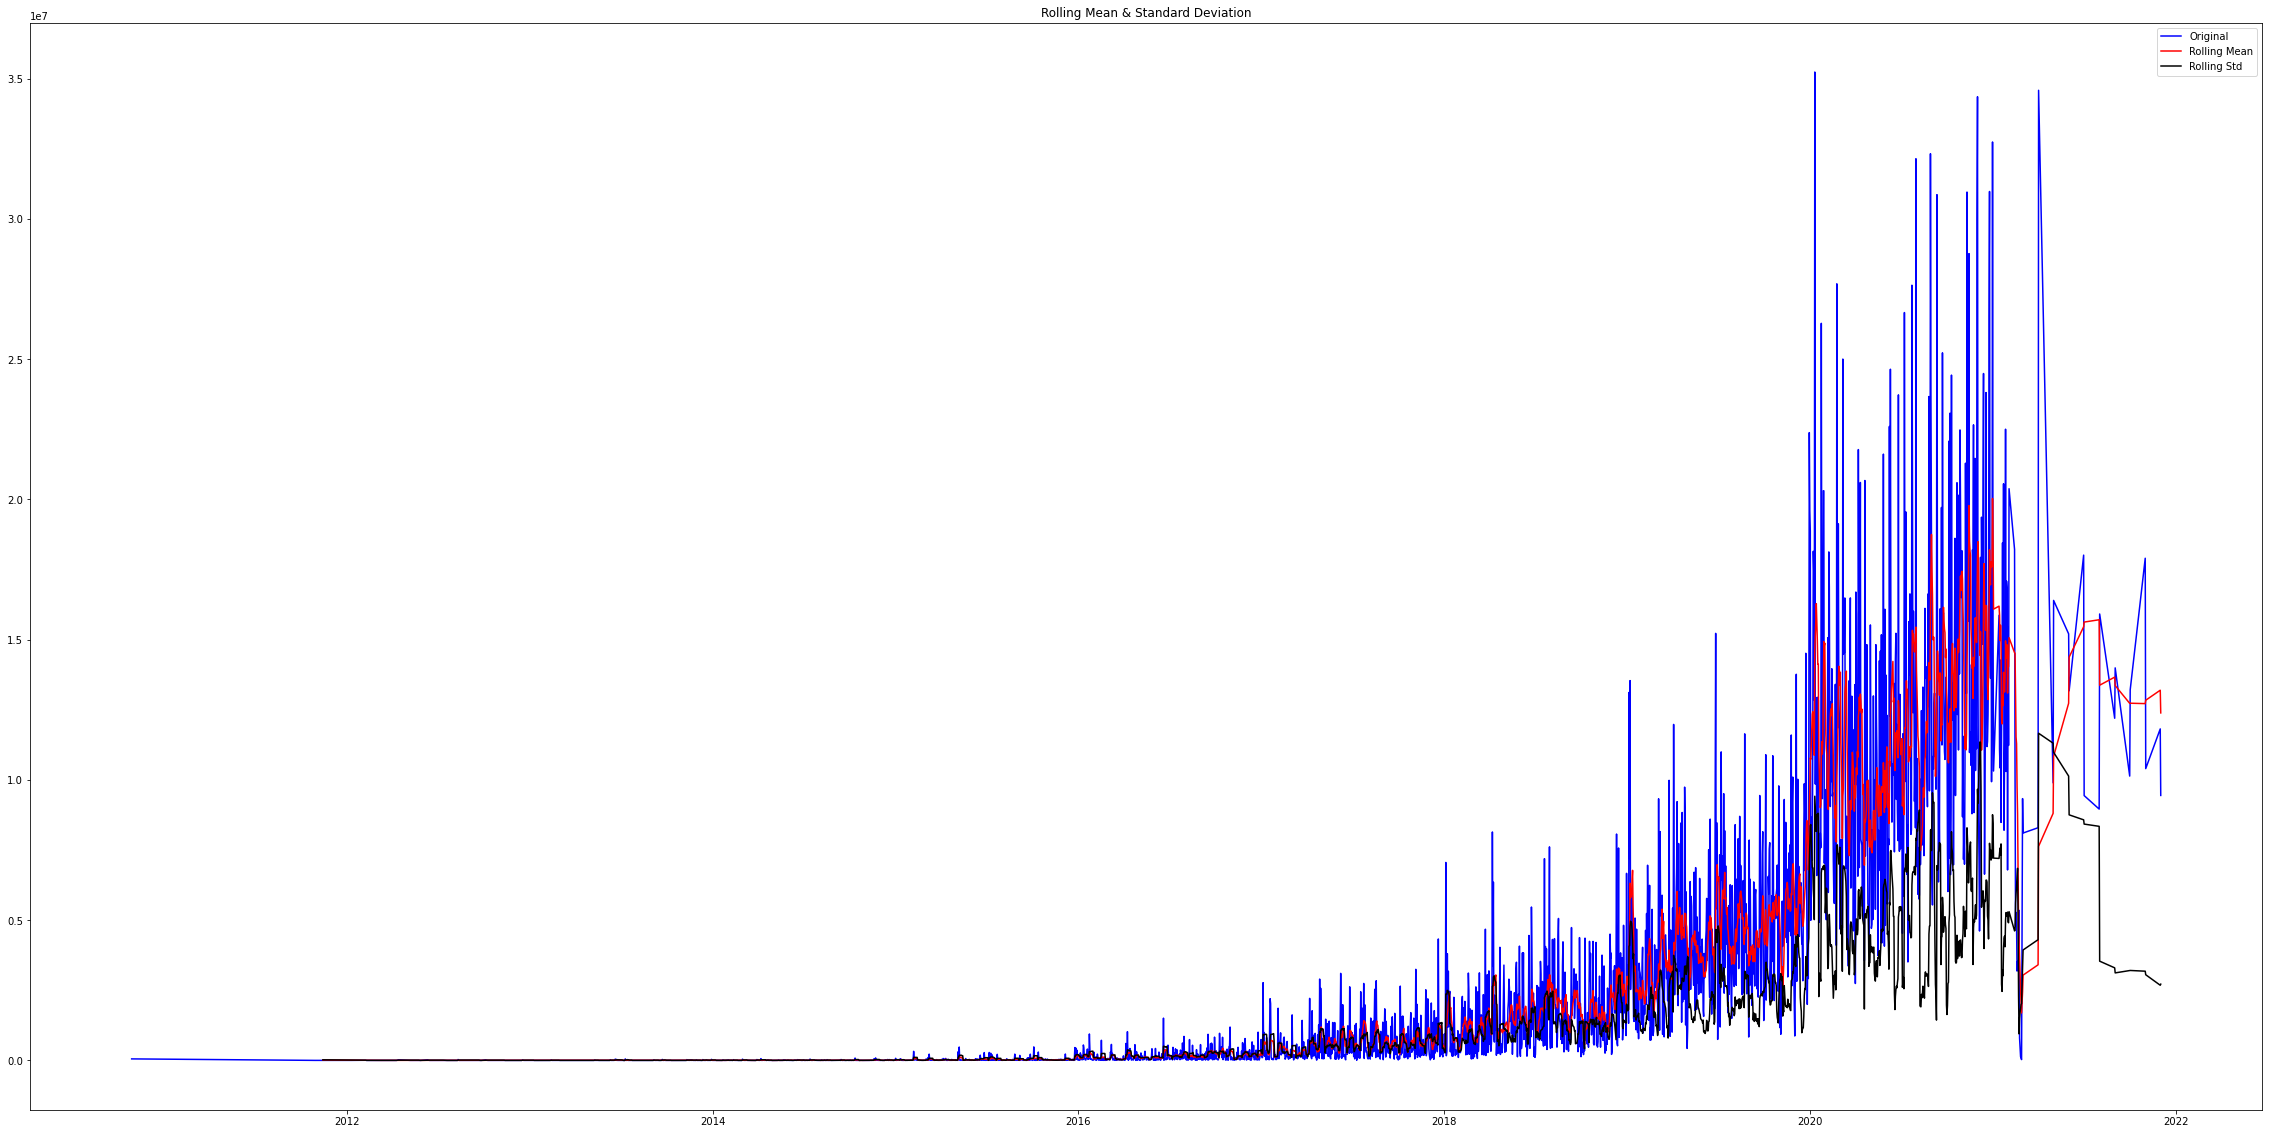

In [12]:
fig = plt.figure(figsize=(40,20))
plt.plot(ts, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
#Checking monthly data and weekly data graphs
df_monthly = df2.resample('MS')
monthly_mean = df_monthly.mean()

<AxesSubplot:xlabel='Date Posted'>

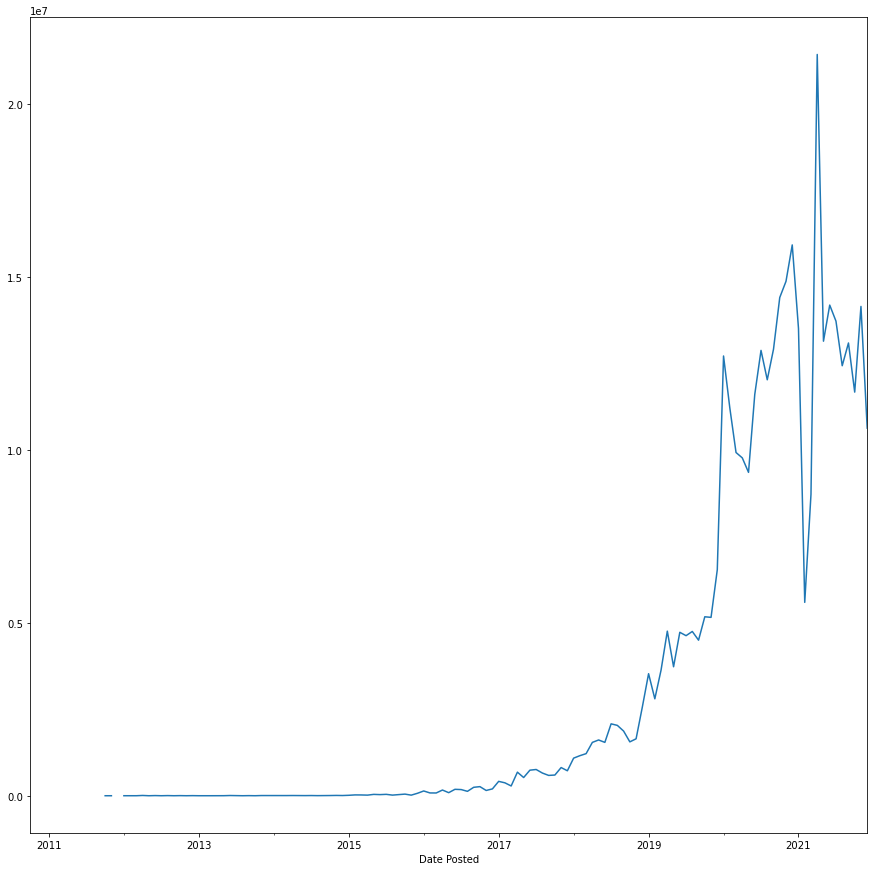

In [27]:
monthly_mean['Likes'].plot(figsize = (15,15))

<AxesSubplot:xlabel='Date Posted'>

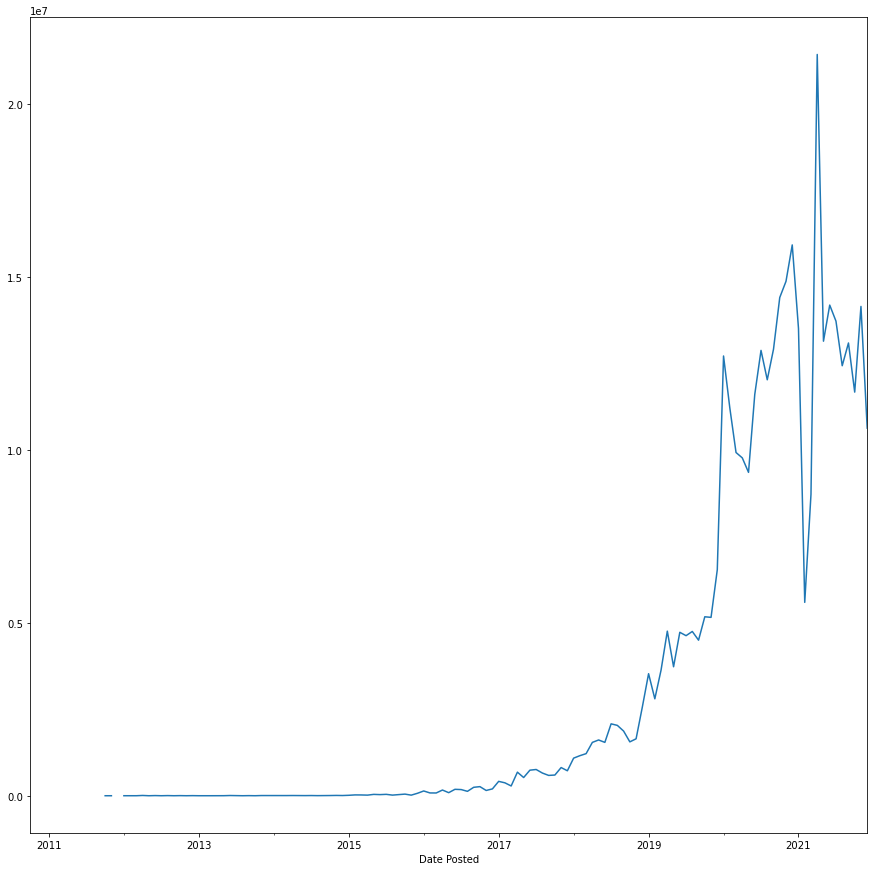

In [29]:
monthly_mean['Likes'].plot(figsize = (15,15))

In [28]:
ts1 = monthly_mean['Likes'].fillna(method='bfill')
roll_mean_1 = ts1.rolling(window=8,center=False).mean()
roll_std_1 = ts1.rolling(window=8,center=False).std()

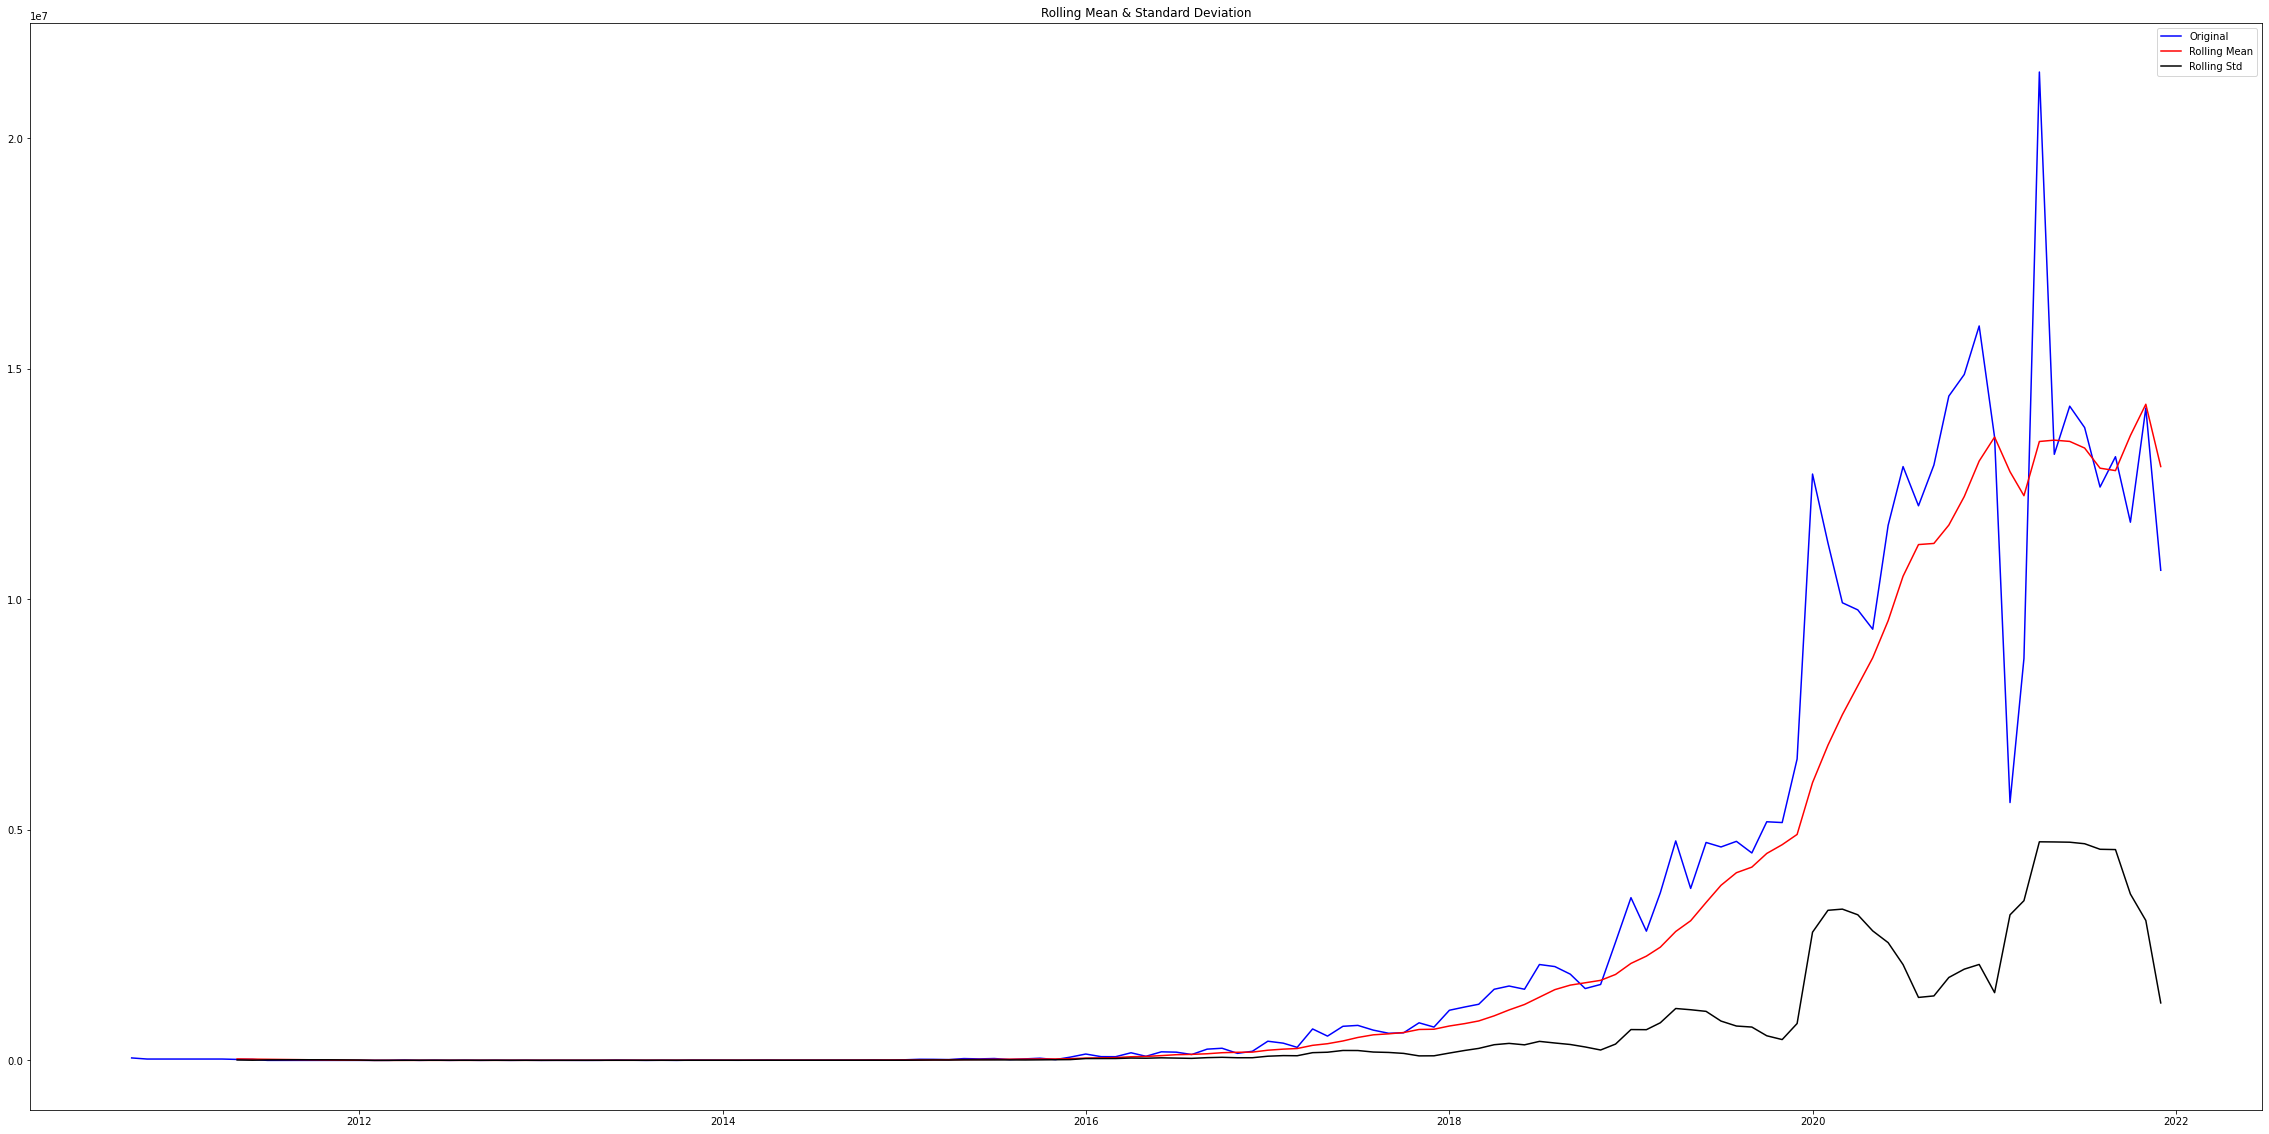

In [16]:
fig = plt.figure(figsize=(40,20))
plt.plot(ts1, color='blue', label='Original')
plt.plot(roll_mean_1, color='red', label='Rolling Mean')
plt.plot(roll_std_1, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

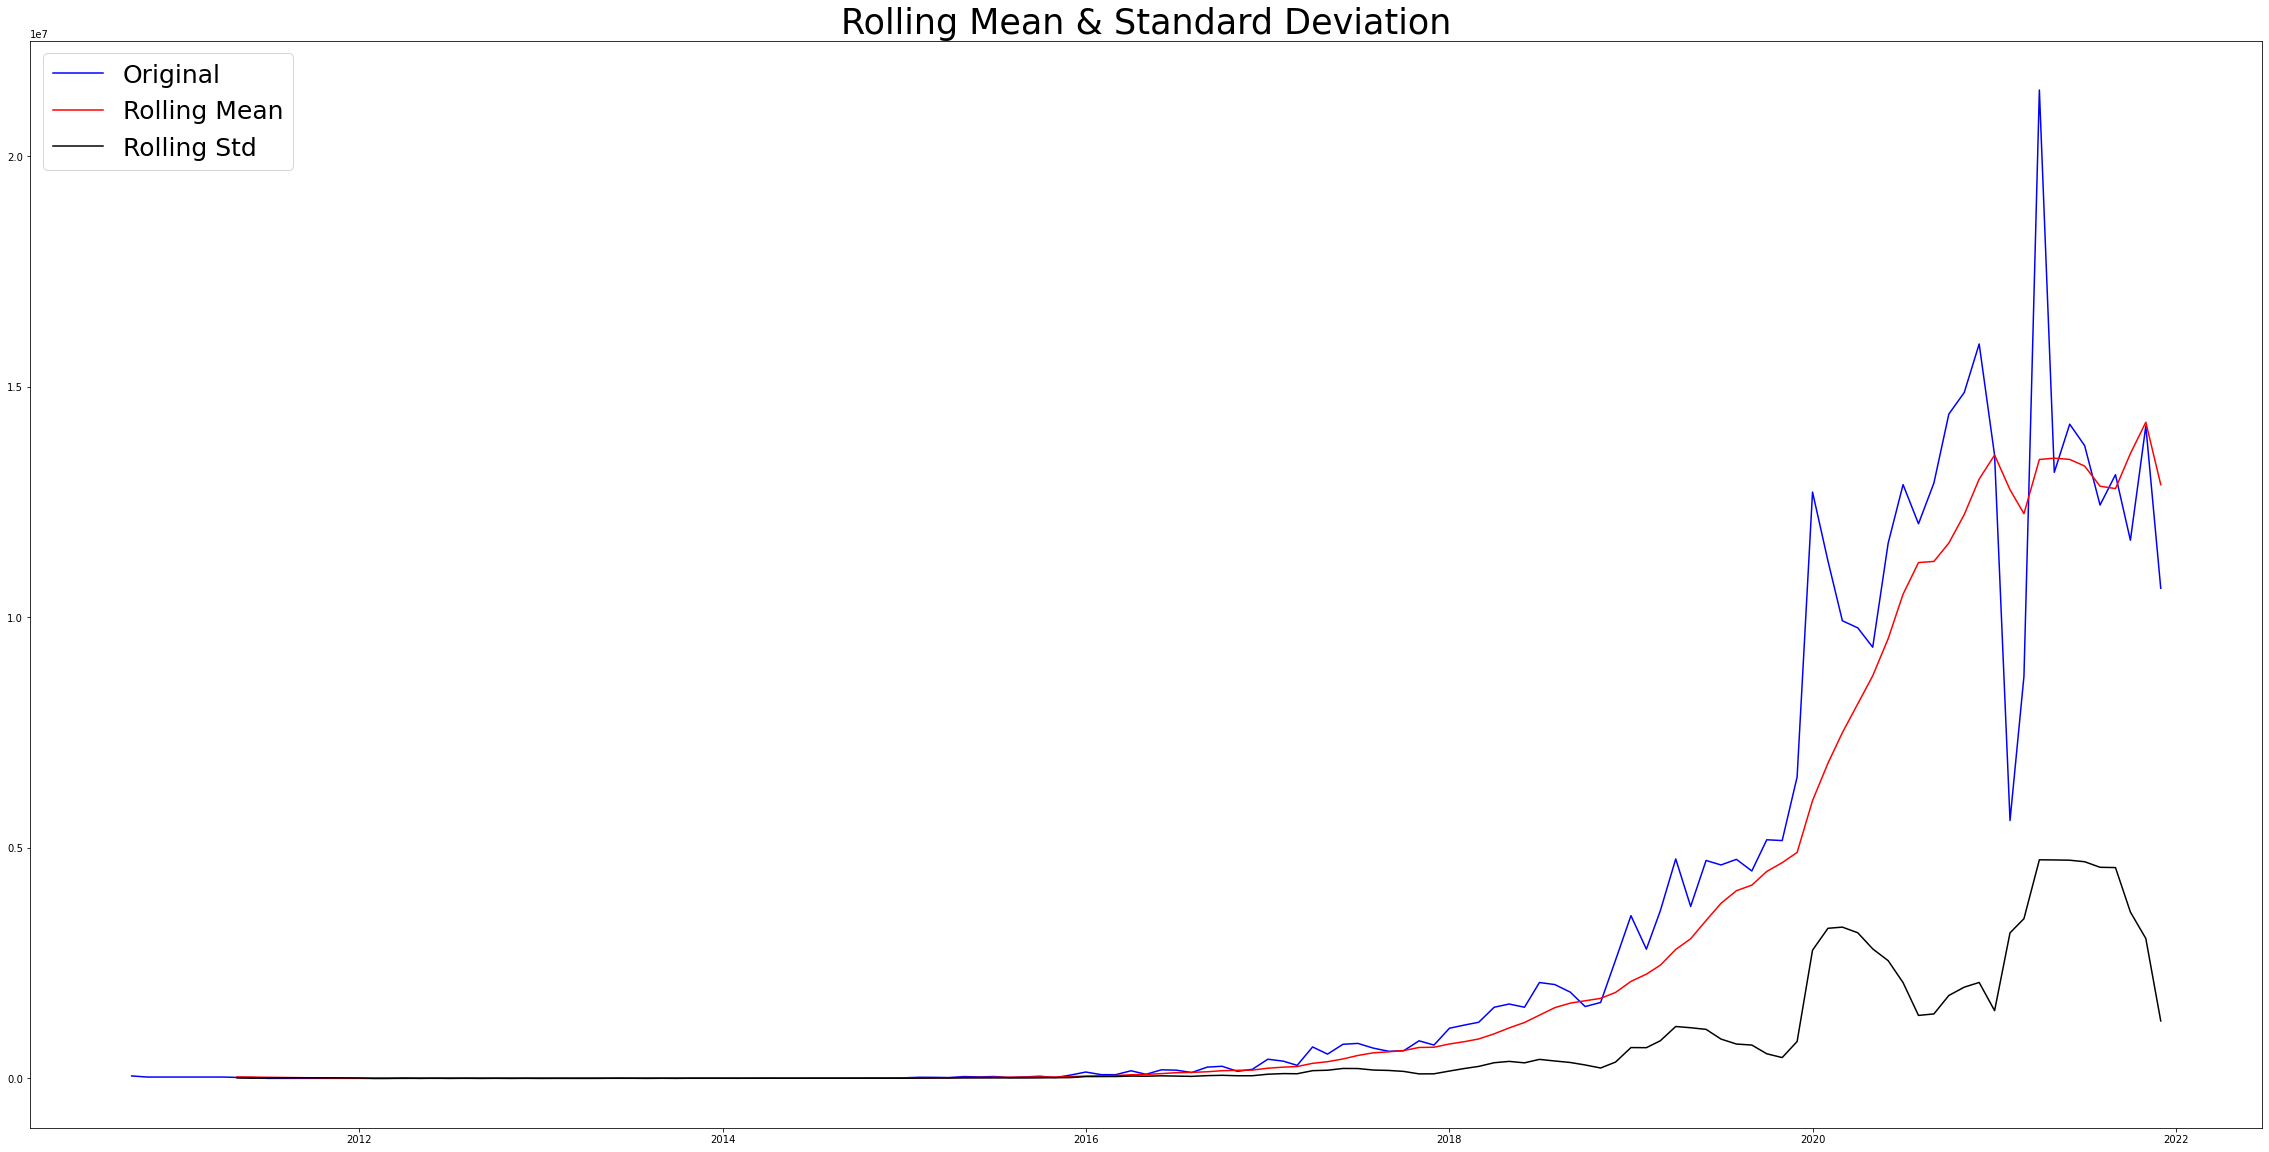

In [36]:
fig = plt.figure(figsize=(40,20))
plt.plot(ts1, color='blue', label='Original')
plt.plot(roll_mean_1, color='red', label='Rolling Mean')
plt.plot(roll_std_1, color='black', label = 'Rolling Std')
plt.legend(loc='best',fontsize=25)
plt.title('Rolling Mean & Standard Deviation',fontsize=35)
plt.show(block=False)

## Data is looking faily sparse here, much more visible than the daily though. 

In [17]:
df_weekly = df2.resample('W-MON')
weekly_mean = df_weekly.mean()

In [18]:
ts2 = weekly_mean['Likes'].fillna(method='bfill')
ts2

Date Posted
2010-11-01       52973.0
2010-11-08       29170.0
2010-11-15       29170.0
2010-11-22       29170.0
2010-11-29       29170.0
                 ...    
2021-11-08    10400709.0
2021-11-15    10630567.5
2021-11-22    10630567.5
2021-11-29    10630567.5
2021-12-06    10630567.5
Freq: W-MON, Name: Likes, Length: 580, dtype: float64

In [19]:
roll_mean_2 = ts2.rolling(window=8, center=False).mean()
roll_std_2 = ts2.rolling(window=8, center=False).std()

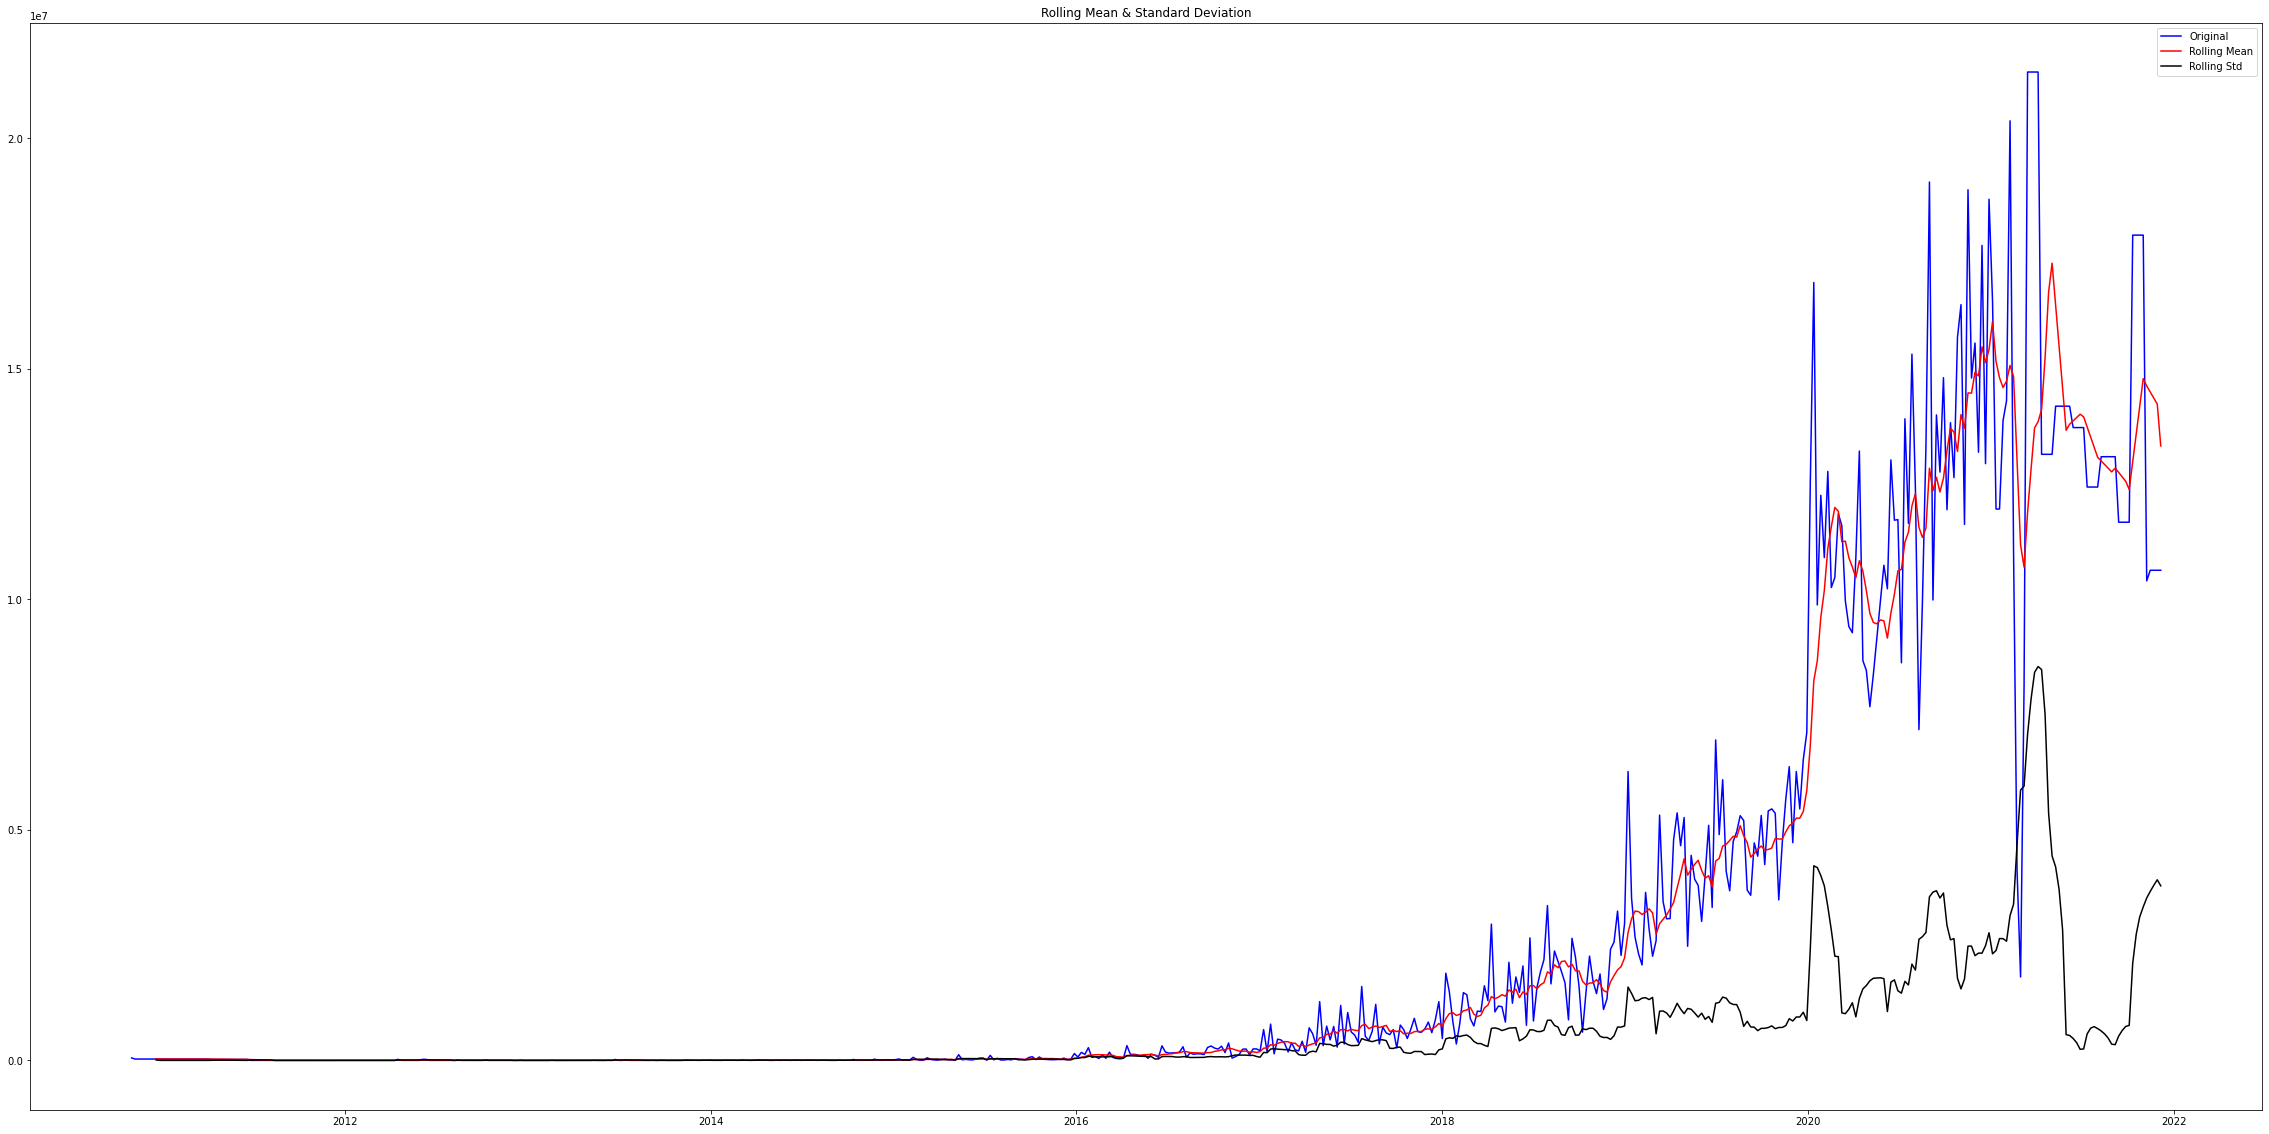

In [20]:
fig = plt.figure(figsize=(40,20))
plt.plot(ts2, color='blue', label='Original')
plt.plot(roll_mean_2, color='red', label='Rolling Mean')
plt.plot(roll_std_2, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## This grap for weekly looks a lot better than the monthly and daily data visually. Going to try and look at this in the model to see further. 

In [21]:
ts2

Date Posted
2010-11-01       52973.0
2010-11-08       29170.0
2010-11-15       29170.0
2010-11-22       29170.0
2010-11-29       29170.0
                 ...    
2021-11-08    10400709.0
2021-11-15    10630567.5
2021-11-22    10630567.5
2021-11-29    10630567.5
2021-12-06    10630567.5
Freq: W-MON, Name: Likes, Length: 580, dtype: float64

## Checking DickeyFuller Test

In [22]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts2)

In [23]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   0.753479
p-value                          0.990847
#Lags Used                      18.000000
Number of Observations Used    561.000000
Critical Value (1%)             -3.442060
Critical Value (5%)             -2.866706
Critical Value (10%)            -2.569521
dtype: float64


In [24]:
# Very high P-value, data is extrememly not stationary